PART II - LOGISTIC REGRESSION
Target chosen - Gender (To predict : Male/Female)

In [4]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle



In [5]:
df = pd.read_csv('penguins_cleaned.csv')
X_data = df.drop('gender',axis='columns')
Y_target = df.gender
print(Y_target)

0      1
1      0
2      0
3      1
4      0
      ..
339    1
340    0
341    1
342    1
343    0
Name: gender, Length: 344, dtype: int64


In [29]:
data_size = len(df)
train_count = int(0.8*data_size)

X_train = X_data[:train_count]
X_test = X_data[train_count:]
Y_train = Y_target[:train_count]
Y_test = Y_target[train_count:]


print(X_train,X_test,Y_train,Y_test)
print("Shape : ",np.shape(X_train),np.shape(X_test),np.shape(Y_train),np.shape(Y_test))
print("Shape of df : ",np.shape(df))

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0          0       2        0.254545       0.666667           0.152542   
1          0       2        0.269091       0.511905           0.237288   
2          0       2        0.298182       0.583333           0.389831   
3          0       2        0.487062       0.585514           0.436693   
4          0       2        0.167273       0.738095           0.355932   
..       ...     ...             ...            ...                ...   
270        2       0        0.549091       0.071429           0.711864   
271        2       0        0.487062       0.585514           0.436693   
272        2       0        0.534545       0.142857           0.728814   
273        2       0        0.665455       0.309524           0.847458   
274        2       0        0.476364       0.202381           0.677966   

     body_mass_g  
0       0.291667  
1       0.305556  
2       0.152778  
3       0.375000  
4       0.208333

In [38]:
class LogisticRegression():
    def __init__(self, learning_rate, iterations):
        self.learning_rate= learning_rate
        self.iterations = iterations
        self.weights=[]
        self.yPred=0
    def sigmoid(self,val):
        sigmoid_fun = (1/(1+np.exp(-val)))
        return sigmoid_fun
    def cost(self,X,y):
        yPred = self.sigmoid(np.dot(X,self.weights))
        #print(yPred)
        loss = -1 * np.mean( y*np.log10(yPred) + (1-y)*np.log10(1-yPred)) 
        #print('loss : ',loss)
        return loss
    def gradient_descent(self, w, X, y, lr):
        n = X.shape[0]
        gradient = (1/n) * np.dot(X.T, (self.yPred - y))
        self.weights -= (lr * gradient.T)
    def predict(self,w,X):
        yPred = self.sigmoid(np.dot(X,w))
        #print(yPred)
        ans_arr = []
        #print(yPred)
        for y in yPred:
            if (y>=0.5):
                ans_arr.append(1)
            else:
                ans_arr.append(0)
        return ans_arr
    def initialize_weights(self, num_features): 
        w = np.random.uniform(0,1,(num_features))
        return w
    def fit(self,X, y, learning_rate=0.001, iterations=100000):
        ones = np.ones((X.shape[0],1),dtype=int)
        self.weights = self.initialize_weights(X.shape[1])
        tr_loss_arr=[]
        for i in range(iterations):
            self.yPred = self.sigmoid(np.dot(X,self.weights))
            self.gradient_descent(self.weights,X,y,learning_rate)
            loss_val = self.cost(X,y) #RETURN OUTSIDE LOOP
            #print(loss_val)
            tr_loss_arr.append(loss_val)
        return tr_loss_arr
    def find_accuracy(self,Y_ground,Y_pred):
        n=len(Y_pred)
        y_pred_arr = []
        y_grnd_arr = []
        correct_val = 0
        print(n)
        for i in Y_pred:
            y_pred_arr.append(i)
        for i in Y_ground:
            y_grnd_arr.append(i)
        for i in range (len(y_pred_arr)):
            if(y_grnd_arr[i]==y_pred_arr[i]):
                correct_val+=1;
        print('Correct predictions : ', correct_val)
        print('Incorrect predictions : ',n-correct_val)
        return round(correct_val/n*100)


if __name__ == '__main__':
    log_reg = LogisticRegression(0.01,100)
    
    Y_train_loss1 = log_reg.fit(X_train,Y_train,0.01,1000)
    Y_pred = log_reg.predict(log_reg.weights,X_test)
    accuracy = log_reg.find_accuracy(Y_test,Y_pred)
    print('weight',log_reg.weights)
    print('Accuracy with lr = 0.01 and 1000 iterations : ',accuracy)
    
    Y_train_loss2 = log_reg.fit(X_train,Y_train,0.001,10000)
    Y_pred = log_reg.predict(log_reg.weights,X_test)
    accuracy = log_reg.find_accuracy(Y_test,Y_pred)
    print('weight',log_reg.weights)
    print('Accuracy with lr = 0.001 and 10000 iterations : ',accuracy)

    Y_train_loss3 = log_reg.fit(X_train,Y_train,0.001,100000)
    Y_pred = log_reg.predict(log_reg.weights,X_test)
    accuracy = log_reg.find_accuracy(Y_test,Y_pred)
    print('weight',log_reg.weights)
    print('Accuracy with lr = 0.001 and 100000 iterations : ',accuracy)
    
#plot, weight print, pickle
    
    

69
Correct predictions :  43
Incorrect predictions :  26
weight [-0.43644849 -0.31200497  0.48173602  0.65854481  0.09974323  0.87812694]
Accuracy with lr = 0.01 and 1000 iterations :  62
69
Correct predictions :  43
Incorrect predictions :  26
weight [-0.4252357  -0.14670681  0.69305872  0.0794824   0.32872377  0.65664958]
Accuracy with lr = 0.001 and 10000 iterations :  62
69
Correct predictions :  59
Incorrect predictions :  10
weight [-0.96305775 -0.67409477  1.06986703  0.70413531  0.09266983  1.94218155]
Accuracy with lr = 0.001 and 100000 iterations :  86


In [39]:
pickle_filename = 'logreg_penguins.p'
model_info = {
    'learning rate' : 0.001,
    'iterations' : 100000,
    'model_weights': log_reg.weights,  # Store the model weights
    'accuracy': accuracy  # Store the accuracy
}
with open(pickle_filename, 'wb') as file:
    pickle.dump(model_info,file)

In [40]:
pd.read_pickle(pickle_filename)

{'learning rate': 0.001,
 'iterations': 100000,
 'model_weights': array([-0.96305775, -0.67409477,  1.06986703,  0.70413531,  0.09266983,
         1.94218155]),
 'accuracy': 86}

In [41]:
with open(pickle_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print(loaded_model)

{'learning rate': 0.001, 'iterations': 100000, 'model_weights': array([-0.96305775, -0.67409477,  1.06986703,  0.70413531,  0.09266983,
        1.94218155]), 'accuracy': 86}


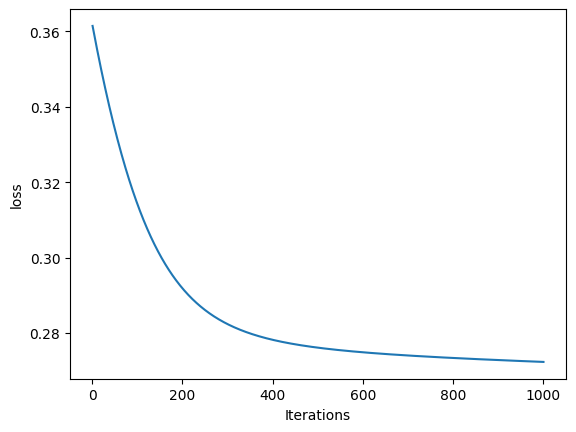

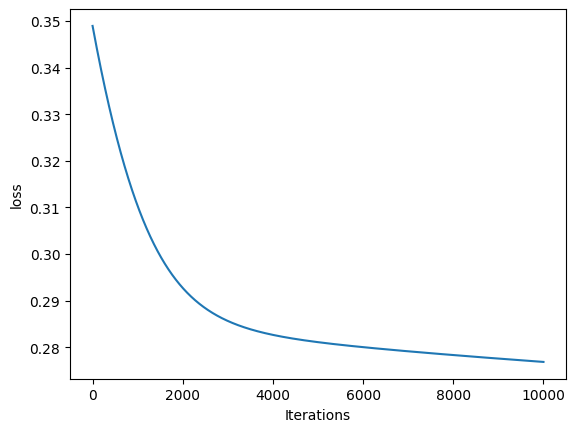

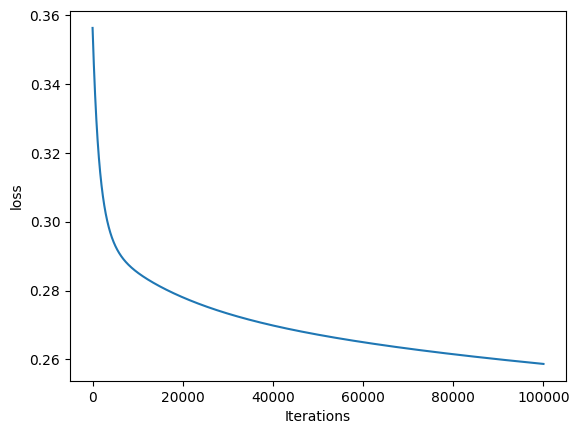

In [42]:
plt.plot(np.arange(1,1001),Y_train_loss1)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

plt.plot(np.arange(1,10001),Y_train_loss2)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

plt.plot(np.arange(1,100001),Y_train_loss3)
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.show()

In [78]:
'''
Best accuracy : 86%

From the losss graph it is analysed that when the iterations increases the loss decreases

Iteration1:
Correct predictions :  43
Incorrect predictions :  26    
weight [-0.43644849 -0.31200497  0.48173602  0.65854481  0.09974323  0.87812694    ]
Accuracy with lr = 0.01 and 1000 iterations :  62

Iterati2:
  Correct predictions :  3
    
Incorrect predictions :  26    
weight [-0.4252357  -0.14670681  0.69305872  0.0794824   0.32872377  0.65664958    <br>]
Accuracy with lr = 0.001 and 10000 iteration62622:

Ittion3:
    Correct predictions : 59
    
Incorrect predictions :  10    
weight [-0.96305775 -0.67409477  1.06986703  0.70413531  0.09266983  1.94218155    ]
Accuracy with lr = 0.001 and 100000 iterati86ons : 

ADVANTAGES:
Logistic regression is easy to implement
It provides good accuracy and faster classification
It can determine the weight co-efficients efficiently
DISADVANTAGES:
If features is greater than the number of data samples it doesnt fit
It can only solve linearly seperable data
Sensitive to outliers
'''

'\nBest accuracy : 86%\n\nFrom the losss graph it is analysed that when the iterations increases the loss decreases\n\nIteration1:\nCorrect predictions :  43\nIncorrect predictions :  26    \nweight [-0.43644849 -0.31200497  0.48173602  0.65854481  0.09974323  0.87812694    ]\nAccuracy with lr = 0.01 and 1000 iterations :  62\n\nIterati2:\n  Correct predictions :  3\n    \nIncorrect predictions :  26    \nweight [-0.4252357  -0.14670681  0.69305872  0.0794824   0.32872377  0.65664958    <br>]\nAccuracy with lr = 0.001 and 10000 iteration62622:\n\nIttion3:\n    Correct predictions : 59\n    \nIncorrect predictions :  10    \nweight [-0.96305775 -0.67409477  1.06986703  0.70413531  0.09266983  1.94218155    ]\nAccuracy with lr = 0.001 and 100000 iterati86ons : \n\nADVANTAGES:\nLogistic regression is easy to implement\nIt provides good accuracy and faster classification\nIt can determine the weight co-efficients efficiently\nDISADVANTAGES:\nIf features is greater than the number of data s